In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dat = pd.read_csv('../data/weather data/phoenix_scotts_weather_data.txt')

In [3]:
dat.head(2)

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
0,722780,23183,19730101,44.9,24,30.9,24,1011.7,23,972.1,...,7.2,24,17.1,27.0,53.1*,37.9*,0.00H,999.9,10000,NaN
1,722780,23183,19730102,44.9,24,34.0,24,1014.9,24,975.2,...,4.9,24,15.0,999.9,57.9*,37.0*,0.00G,999.9,10000,NaN


In [4]:
## cleaning
dat.columns = [i.strip() for i in dat.columns]
dat.head(1)

,STN---,WBAN,YEARMODA,TEMP,,DEWP,.1,SLP,.2,STP,...,WDSP,.5,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22
0,722780,23183,19730101,44.9,24,30.9,24,1011.7,23,972.1,...,7.2,24,17.1,27.0,53.1*,37.9*,0.00H,999.9,10000,NaN


In [5]:
dat = dat.drop(['','.1','.2','.3','.4','.5'], axis=1)

In [6]:
dat.columns
dat['STN---'].value_counts()

722780    15933
722789    10582
999999     8919
Name: STN---, dtype: int64

In [7]:
dat['Station'] = dat.loc[:,'STN---']\
                    .map({722780:'Phoenix Sky Harbor', 
                          999999:'Phoenix Sky Harbor',
                          722789:'Scottsdale'})
del dat['STN---']
dat.head(1)

,WBAN,YEARMODA,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22,Station
0,23183,19730101,44.9,30.9,1011.7,972.1,23.7,7.2,17.1,27.0,53.1*,37.9*,0.00H,999.9,10000,NaN,Phoenix Sky Harbor


In [8]:
dat.Station.value_counts()

Phoenix Sky Harbor    24852
Scottsdale            10582
Name: Station, dtype: int64

In [9]:
# year_month_day = dat.loc[:, 'YEARMODA']

In [10]:
# import datetime
# a = year_month_day.map(lambda x: date(int(str(x)[:4]),
#                                       int(str(x)[4:6]), 
#                                       int(str(x)[6:])))

In [13]:
from datetime import date
dat['Date'] = dat.loc[:,'YEARMODA'].map(lambda x:\
                                        date(int(str(x)[:4]),
                                             int(str(x)[4:6]),
                                             int(str(x)[6:])))
if 'YEARMODA' in dat.columns: 
    del dat['YEARMODA'] 
    print(1)

1


In [14]:
dat.head(1)

,WBAN,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Unnamed: 22,Station,Date
0,23183,44.9,30.9,1011.7,972.1,23.7,7.2,17.1,27.0,53.1*,37.9*,0.00H,999.9,10000,NaN,Phoenix Sky Harbor,1973-01-01


- DEWP ==> Dewpoint
- SLP ==> Sea Level Pressure
- STP ==> ?
- VISIB ==> Visibility
- WDSP ==> Windspeed
- MXSPD ==> Max Windspeed
- GUST ==> Gust - A rapid fluctuation of wind speed with variations of 10 knots or more between peaks and lulls.
- SNDP ==> Snow Depth
- FRSHTT ==> ?
- 

In [15]:
del dat['Unnamed: 22']

In [16]:
phoenix = dat[dat['Station']=='Phoenix Sky Harbor']
scottsdale = dat[dat['Station']=='Scottsdale']

In [17]:
# phoenix.isnull().sum()

In [18]:
# scottsdale.isnull().sum()

In [19]:
scottsdale.head(2)

,WBAN,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN,PRCP,SNDP,FRSHTT,Station,Date
15933,3192,57.2,34.0,1013.2,960.3,10.0,1.7,5.1,999.9,66.9,46.9,0.00G,999.9,0,Scottsdale,2006-01-01
15934,3192,60.4,34.1,1014.4,961.4,10.0,1.8,8.0,999.9,75.9,46.9,0.00G,999.9,0,Scottsdale,2006-01-02


In [20]:
scottsdale = scottsdale.reset_index(drop=True)

In [21]:
scottsdale.dtypes

WBAN         int64
TEMP       float64
DEWP       float64
SLP        float64
STP        float64
VISIB      float64
WDSP       float64
MXSPD      float64
GUST       float64
MAX         object
MIN         object
PRCP        object
SNDP       float64
FRSHTT       int64
Station     object
Date        object
dtype: object

In [22]:
scottsdale.MAX = scottsdale.MAX.map(lambda x: x.replace('*','')).astype(float)
scottsdale.MIN = scottsdale.MIN.map(lambda x: x.replace('*', '')).astype(float)

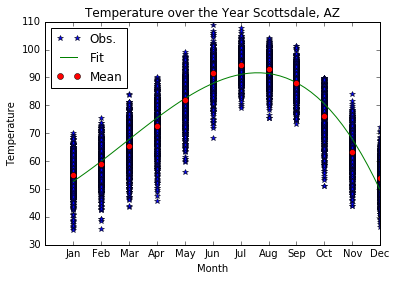

In [23]:
import calendar
scottsdale['Month'] = scottsdale.Date.map(lambda x: x.month)
months = [calendar.month_abbr[i] for i in range(0,13)]
x = scottsdale.Month
y = scottsdale.TEMP
by_month = scottsdale.groupby('Month')

z = np.polyfit(x, y, 3)
p = np.poly1d(z)
xp = np.linspace(1, 12)

plt.plot(x, y, '*', xp, p(xp), '-')
plt.plot(by_month.TEMP.mean(), 'ro')
plt.title('Temperature over the Year Scottsdale, AZ')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend(['Obs.', 'Fit', 'Mean'], loc='best')

plt.xticks(range(13), months)
# lin = 
plt.show()

In [24]:
scottsdale.PRCP = scottsdale.PRCP.map(lambda x: None if x=='99.99' else x[:-1]).astype(float)

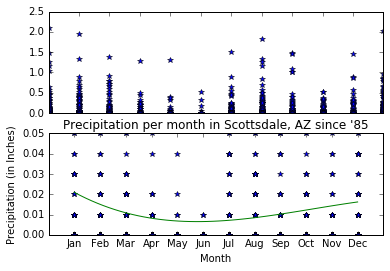

In [25]:
x = scottsdale.Month[scottsdale['PRCP']!=99.99]
y = scottsdale.PRCP[scottsdale['PRCP']!=99.99]


z = np.polyfit(x, y, 3)
p = np.poly1d(z)
xp = np.linspace(1, 12)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
plt.title("Precipitation per month in Scottsdale, AZ since '85")
plt.ylabel('Precipitation (in Inches)')

ax1.plot(x, y, '*')
ax1.set_xticks(range(14))

ax2.plot(x, y, '*', xp, p(xp), '-')
ax2.set_ylim(0,0.05)
plt.xticks(range(14), months)
plt.xlabel('Month')
plt.show()

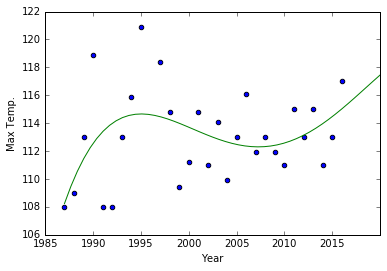

In [26]:
scottsdale['Year'] = scottsdale.loc[:,'Date'].map(lambda x: x.year).astype(int)
gr_by_year = scottsdale.groupby('Year')
x = gr_by_year.Year.max()[gr_by_year.MAX.max() < 500]
y = gr_by_year.MAX.max()[gr_by_year.MAX.max() < 500]
plt.scatter(x,y)

z = np.polyfit(x, y, 4)
p = np.poly1d(z)

xp = np.linspace(1987, 2020)
plt.plot(x, y, '.', xp, p(xp), '-')

plt.xticks(range(1985,2020,5))
plt.xlim(1985,2020)
plt.xlabel('Year')
plt.ylabel('Max Temp.')
plt.show()

In [27]:
scottsdale = scottsdale.drop(['WBAN', 'FRSHTT', 'Station', 'SNDP', 'SLP', 'STP', 'GUST'], axis=1)

In [28]:
scottsdale.describe()

,TEMP,DEWP,VISIB,WDSP,MXSPD,MAX,MIN,PRCP,Month,Year
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,74.660253,169.987649,23.783217,4.155557,12.773814,86.638169,69.160877,2.477252,6.504820,2001.728123
std,15.814564,1138.340954,17.819568,2.166663,52.801262,97.633944,273.597846,15.507721,3.440603,8.445452
min,35.300000,-6.500000,4.000000,0.000000,2.900000,42.100000,24.300000,0.000000,1.000000,1987.000000
25%,60.700000,28.600000,10.000000,2.500000,7.000000,72.900000,48.200000,0.000000,4.000000,1994.000000
50%,75.000000,36.500000,10.000000,3.900000,8.900000,87.000000,61.000000,0.000000,7.000000,2002.000000
75%,89.200000,48.200000,38.100000,5.500000,12.000000,100.000000,75.000000,0.000000,9.000000,2009.000000
max,108.800000,9999.900000,999.900000,14.800000,999.900000,9999.900000,9999.900000,99.990000,12.000000,2016.000000


In [29]:
## changing missing vals (9999.99) to NAs
scottsdale['DEWP'] = scottsdale.loc[:,'DEWP'].map(lambda x: None if x == 9999.900000 else x)
scottsdale['VISIB'] = scottsdale.loc[:,'VISIB'].map(lambda x: None if x == 999.900000 else x)
scottsdale['MXSPD'] = scottsdale.loc[:,'MXSPD'].map(lambda x: None if x == 999.900000 else x)
scottsdale['MAX'] = scottsdale.loc[:,'MAX'].map(lambda x: None if x == 9999.900000 else x)
scottsdale['MIN'] = scottsdale.loc[:,'MIN'].map(lambda x: None if x == 9999.900000 else x)
scottsdale['PRCP'] = scottsdale.loc[:,'PRCP'].map(lambda x: None if x == 99.990000 else x)

scottsdale['Day'] = scottsdale.loc[:, 'Date'].map(lambda x: x.day).astype(int)
del(scottsdale['Date'])

In [30]:
# scottsdale.describe()
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')
imp_data = imp.fit_transform(scottsdale)
scottsdale = pd.DataFrame(imp_data, columns=scottsdale.columns)

In [31]:
scottsdale.describe()
# scottsdale = scottsdale.drop(['MAX', 'MIN'], axis=1)

,TEMP,DEWP,VISIB,WDSP,MXSPD,MAX,MIN,PRCP,Month,Year,Day
count,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000,10582.000000
mean,74.660253,38.194149,23.690965,4.155557,9.967352,85.701276,61.647551,0.011325,6.504820,2001.728123,15.734077
std,15.814564,13.384055,15.082438,2.166663,4.168866,15.615582,15.357271,0.086115,3.440603,8.445452,8.789216
min,35.300000,-6.500000,4.000000,0.000000,2.900000,42.100000,24.300000,0.000000,1.000000,1987.000000,1.000000
25%,60.700000,28.600000,10.000000,2.500000,7.000000,72.900000,48.200000,0.000000,4.000000,1994.000000,8.000000
50%,75.000000,36.500000,10.000000,3.900000,8.900000,86.900000,61.000000,0.000000,7.000000,2002.000000,16.000000
75%,89.200000,47.300000,38.100000,5.500000,12.000000,100.000000,75.000000,0.000000,9.000000,2009.000000,23.000000
max,108.800000,73.400000,61.400000,14.800000,45.800000,120.900000,100.400000,2.090000,12.000000,2016.000000,31.000000


In [32]:
y = scottsdale.loc[:, 'TEMP']
X = scottsdale.ix[:,1:]
from sklearn.cross_validation import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.33,
                                                    random_state=1)

In [33]:
train_x.shape

(7089, 10)

In [34]:
train_y.head()

1676    96.0
1975    78.0
1853    55.7
4116    67.5
5948    52.2
Name: TEMP, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()#LogisticRegressionCV()
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
pred = lr.predict(test_x)
print(pred[:10], test_y[:10])

[ 87.73639404  62.4711311   99.73857854  51.94037118  80.6316368
  62.33967432  44.52466295  93.28839079  53.76818903  90.18264807] 10035    88.6
8716     61.1
8557     98.3
8765     52.4
1217     81.6
5477     60.4
2583     45.4
10402    90.7
9421     54.7
2018     91.9
Name: TEMP, dtype: float64


In [37]:
# for i,idx in enumerate(pred):
lr.score(test_x, test_y)

0.99052529602349326

***
## Results
So ~42% is pretty decent score without any temperature information, but weather forcasters have the weather from previous days. Let's take a look!<br>
We need to shift the data one day, so we are not predicting today's temperature with 'today's' data
***

In [38]:
# scottsdale['PrevDayTemp'] = pd.DataFrame(scottsdale.loc[:,'TEMP']).shift()
# scottsdale['PrevDayMax'] = pd.DataFrame(scottsdale.loc[:,'MAX']).shift()
# scottsdale['PrevDayMin'] = pd.DataFrame(scottsdale.loc[:,'MIN']).shift()

scottsdale = scottsdale.shift()

In [39]:
scottsdale = scottsdale.ix[1:,:]
scottsdale = scottsdale.reset_index(drop=True)

In [40]:
train = scottsdale[scottsdale['Year']<2013]
test = scottsdale[scottsdale['Year']>=2013]

In [41]:
train_x, train_y = train.ix[:,1:], train.ix[:,0]
test_x, test_y = test.ix[:,1:], test.ix[:,0]

In [42]:
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# x1 = lr.score(test_x, test_y)
# pred1 = lr.predict(test_x)

In [44]:
print(lr.predict(test_x)[:10], test_y[:10])
lr.score(test_x, test_y)

[ 42.1606807   46.77634882  48.32547765  47.6318796   46.61693083
  51.31012573  49.60434136  51.0502622   56.05245211  55.78774478] 2555    43.0
2556    48.5
2557    50.9
2558    48.3
2559    46.2
2560    49.9
2561    49.8
2562    50.5
2563    53.7
2564    52.4
Name: TEMP, dtype: float64


0.98774248467097614

In [45]:
pre = lr.predict(test_x)
t_y = list(test_y)

In [47]:
for i in range(25):
    print('Predicted Temp: %.4f | Actual Temp: %.4f' % (pre[i], t_y[i]))

Predicted Temp: 42.1607 | Actual Temp: 43.0000
Predicted Temp: 46.7763 | Actual Temp: 48.5000
Predicted Temp: 48.3255 | Actual Temp: 50.9000
Predicted Temp: 47.6319 | Actual Temp: 48.3000
Predicted Temp: 46.6169 | Actual Temp: 46.2000
Predicted Temp: 51.3101 | Actual Temp: 49.9000
Predicted Temp: 49.6043 | Actual Temp: 49.8000
Predicted Temp: 51.0503 | Actual Temp: 50.5000
Predicted Temp: 56.0525 | Actual Temp: 53.7000
Predicted Temp: 55.7877 | Actual Temp: 52.4000
Predicted Temp: 45.7314 | Actual Temp: 46.9000
Predicted Temp: 37.3622 | Actual Temp: 38.4000
Predicted Temp: 36.3714 | Actual Temp: 37.5000
Predicted Temp: 34.3150 | Actual Temp: 35.3000
Predicted Temp: 36.3661 | Actual Temp: 36.9000
Predicted Temp: 45.0529 | Actual Temp: 43.1000
Predicted Temp: 54.2148 | Actual Temp: 51.0000
Predicted Temp: 57.2141 | Actual Temp: 57.7000
Predicted Temp: 57.7182 | Actual Temp: 55.8000
Predicted Temp: 58.2173 | Actual Temp: 57.1000
Predicted Temp: 61.2557 | Actual Temp: 57.7000
Predicted Tem